In [1]:
# Imports
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import os, math
import numpy as np
import scipy.stats as st
import statistics
from scipy.fftpack import fft

# import scaleogram as scg
# import pywt
from datetime import datetime

import time

In [2]:
def minmax(vector, vector_min, vector_max):
    return (vector - vector_min) / (vector_max - vector_min)

def bound(vector):
    for i in range(len(vector)):
        if vector[i] > 1.0:
            vector[i] = 1.0
        elif vector[i] < 0.0:
            vector[i] = 0.0
    return vector

def ufrf(t, b, n, y, k):
    return y+(k*(b/(n**b))*(t**(b-1)))

def my_rms(acc):
    return np.sqrt(np.mean(acc**2))

def my_kurt(acc):
    return st.kurtosis(acc, fisher=False)

# def my_var(acc):
#     return statistics.variance(acc)

# def my_pkpk(acc):
#     return np.amax(acc)-np.amin(acc)

# def my_skew(acc):
#     return st.skew(acc)

# def feature_extraction(data):
#     return np.array([np.apply_along_axis(my_rms, 0, data),
#                      np.apply_along_axis(my_var, 0, data),
#                      np.apply_along_axis(my_pkpk, 0, data),
#                      np.apply_along_axis(my_kurt, 0, data),
#                      np.apply_along_axis(my_skew, 0, data)]).reshape(40)

def extract_data(path, config, step_window = 10):
    files_list = os.listdir(path)

    rms = []
    kurtosis = []
    for file in files_list:  # [:3]:
        data = pd.read_csv(path+file, sep='\t', header=None)
        rms.append(my_rms(data))
        kurtosis.append(my_kurt(data))
        
    rms = np.array(rms)
    kurtosis = np.array(kurtosis)
    rms = rms[:,config].copy()
    kurtosis = kurtosis[:,config].copy()
    
    partial_rmsee = [0, 0, 0, 0, 0, 0, 0, 0, 0]
    for j in range(len(rms) - (step_window - 1)):
        step_rmsee = 0.0
        for i in range(step_window):
            step_rms = rms[j + i]
            step_rmsee += -step_rms*math.log(step_rms)
        step_rmsee /= step_window
        partial_rmsee.append(step_rmsee)

    rmsee = [0, 0, 0, 0, 0, 0, 0, 0, 0]
    for j in range(len(partial_rmsee) - (step_window - 1)):
        step_mean_rmsee = 0.0
        for i in range(step_window):
            step_mean_rmsee += partial_rmsee[j + i]
        step_mean_rmsee /= step_window
        rmsee.append(step_mean_rmsee)
        
    return rms, kurtosis, rmsee

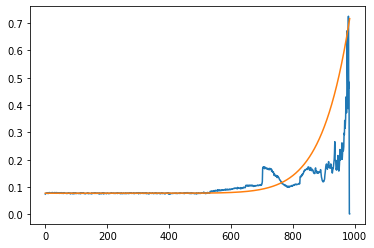

In [3]:
rms_train, kurtosis_train, rmsee_train = extract_data('C:/Users/Projeto/Documents/Matérias/neoprog/2nd_test/', 0)

ufrf_rms = []
for i in range(len(rms_train)):
    ufrf_rms.append(ufrf(i, 12.0917, 281.0209, 0.0773, 1.38e-5))

ufrf_rms = np.array(ufrf_rms)
plt.plot(rms_train)
plt.plot(ufrf_rms)

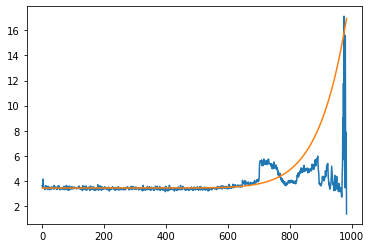

In [4]:
ufrf_kurtosis = []
for i in range(len(kurtosis_train)):
    ufrf_kurtosis.append(ufrf(i, 11.8280, 86.7537,  3.4471, 3.8e-10))

ufrf_kurtosis = np.array(ufrf_kurtosis)
plt.plot(kurtosis_train)
plt.plot(ufrf_kurtosis)

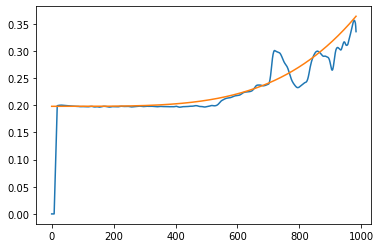

In [5]:
ufrf_rmsee = []

for i in range(len(rmsee_train)):
    ufrf_rmsee.append(ufrf(i, 5.0,  100.0, 0.19796, 3.55e-4))

ufrf_rmsee = np.array(ufrf_rmsee)
plt.plot(rmsee_train)
plt.plot(ufrf_rmsee)

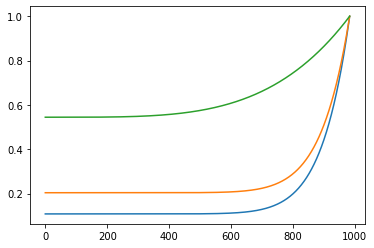

In [6]:
rms_max = ufrf_rms.max()
kurtosis_max = ufrf_kurtosis.max()
rmsee_max = ufrf_rmsee.max()

max_ufrf_rms = ufrf_rms / rms_max
max_ufrf_kurtosis = ufrf_kurtosis / kurtosis_max
max_ufrf_rmsee = ufrf_rmsee / rmsee_max

plt.plot(max_ufrf_rms)
plt.plot(max_ufrf_kurtosis)
plt.plot(max_ufrf_rmsee)

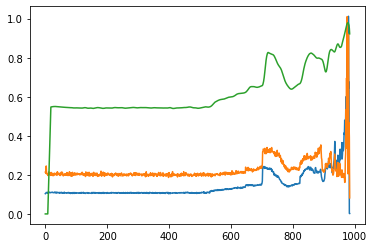

In [7]:
max_rms_train = rms_train / rms_max
max_kurtosis_train = kurtosis_train / kurtosis_max
max_rmsee_train = rmsee_train / rmsee_max

plt.plot(max_rms_train)
plt.plot(max_kurtosis_train)
plt.plot(max_rmsee_train)

In [8]:
len_train = len(rms_train)
X_max = []
X_val = []
y_categoric = []
y_one_hot_label = []

for i in range(len_train - 1):
    categoric_label = None
    one_hot_label = None
    current_label = i / len_train
    if current_label < 0.1:
        categoric_label = 0
        one_hot_label = [1, 0, 0, 0, 0, 0, 0]
    elif current_label < 0.25:
        categoric_label = 1
        one_hot_label = [0, 1, 0, 0, 0, 0, 0]
    elif current_label < 0.4:
        categoric_label = 2
        one_hot_label = [0, 0, 1, 0, 0, 0, 0]
    elif current_label < 0.55:
        categoric_label = 3
        one_hot_label = [0, 0, 0, 1, 0, 0, 0]
    elif current_label < 0.7:
        categoric_label = 4
        one_hot_label = [0, 0, 0, 0, 1, 0, 0]
    elif current_label < 0.85:
        categoric_label = 5
        one_hot_label = [0, 0, 0, 0, 0, 1, 0]
    else:
        categoric_label = 6
        one_hot_label = [0, 0, 0, 0, 0, 0, 1]
    y_one_hot_label.append(one_hot_label)
    y_categoric.append(categoric_label)
    X_max.append([max_ufrf_rms[i], max_ufrf_rms[i+1], max_ufrf_kurtosis[i], max_ufrf_kurtosis[i+1], max_ufrf_rmsee[i], max_ufrf_rmsee[i+1]])
    X_val.append([max_rms_train[i], max_rms_train[i+1], max_kurtosis_train[i], max_kurtosis_train[i+1], max_rmsee_train[i], max_rmsee_train[i+1]])

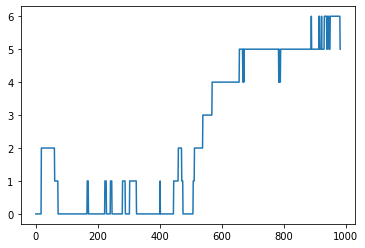

In [9]:
import math, random

class SFAM:
    def _norm(self, X):
        return math.dist(X, self.ZERO)
    
    def _and_fuzzy_norm(self, X, Y):
        AND = []
        for i in range(self.input_size):
            AND.append(min(X[i], Y[i]))
        
        return math.dist(AND, self.ZERO)
    
    def _train(self, X, W):
        result = []
        for i in range(self.input_size):
            result.append(self.beta * min(X[i], W[i]) + (1 - self.beta) * W[i])
            
        return result
        
    
    def __init__(self, input_size, alpha = 1e-5, rho = 0.001, beta = 1.0, uncommited_value = 1.0):
        self.rho = rho
        self.beta = beta
        self.alpha = alpha
        self.input_size = 2 * input_size
        
        ZERO = []
        M = []
        
        for _ in range(self.input_size):
            ZERO.append(0.0)
            M.append(0.5)
        
        self.categories = []
        self.W = []
        self.ZERO = ZERO
        self.m = self._norm(M)
        self.uncommited_value = uncommited_value
        
    def train(self, X, y):
        rho = self.rho
        Xc = []
        for x in X:
            Xc.append(1.0 - x)
        X = X.copy()
        X.extend(Xc)
        
        t = []
        fuzzy_and = []
        for i in range(len(self.W)):
            fuzzy_and.append(self._and_fuzzy_norm(X, self.W[i]))
            t.append(fuzzy_and[i] / (self.alpha + self._norm(self.W[i])))
        
        train_finished = False
        
        while not train_finished:
            winner = -1
            winner_value = -1
            for i in range(len(t)):
                if t[i] > winner_value:
                    winner_value = t[i]
                    winner = i
            
            if self.uncommited_value > winner_value:
                self.W.append(X)
                self.categories.append(y)
                
                train_finished = True
            else:     
                if (fuzzy_and[winner] / self.m) > rho:
                    if self.categories[i] == y:
                        self.W[winner] = self._train(X, self.W[winner])
                        train_finished = True
                    else:
                        rho = fuzzy_and[winner]
                        t[winner] = -1
                        if (rho > 1.0):
                            train_finished = True
                else:
                    t[winner] = -1
                    
    def predict(self, X):
        Xc = []
        for x in X:
            Xc.append(1.0 - x)
        X = X.copy()
        X.extend(Xc)
        
        t = []
        fuzzy_and = []
        for i in range(len(self.W)):
            fuzzy_and.append(self._and_fuzzy_norm(X, self.W[i]))
            t.append(fuzzy_and[i] / (self.alpha + self._norm(self.W[i])))
        
        winner = -1
        winner_value = -1
        for i in range(len(t)):
            if t[i] > winner_value:
                winner_value = t[i]
                winner = i
        
        return self.categories[winner]
    
sfam_max = SFAM(6)

for i in range(len(X_max)):
    sfam_max.train(X_max[i], y_categoric[i])
    
p = []
for i in range(len(X_val)):
    p.append(sfam_max.predict(X_val[i]))
    
plt.plot(p)

In [10]:
# import optuna

# # x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
# len_X_val = len(X_val)

# def objective(trial):
#     rho = trial.suggest_float("rho", 1e-9, 1e+0, log=True)
#     uncommited_value = trial.suggest_float("uv", 1e-9, 1e+0, log=True)
#     alpha = trial.suggest_float("alpha", 1e-9, 1e-1, log=True)
# #     beta = trial.suggest_float("beta", 1e-4, 1e+0, log=True)
# #     rho_a_inc_rate = trial.suggest_float("rho_a_inc_rate", 1e-9, 1e+1, log=True)
#     beta = trial.suggest_float("beta", 1e-9, 1.0, log=True)
    
#     sfam_max = SFAM(6, alpha = alpha, rho = rho, beta = beta, uncommited_value = uncommited_value)
#     for i in range(len_X_val):
#         sfam_max.train(X_max[i], y_categoric[i])

#     result = 0
#     for i in range(len_X_val):
#         if sfam_max.predict(X_val[i]) == y_categoric[i]:
#             result += 1
#     return result / len_X_val

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=1000)
# study.StudySummary()

# #Trial 112 finished with value: 0.3947100712105799 and parameters: {'rho': 3.2358034120332154e-05, 'uv': 0.9835112751325361, 'alpha': 2.7270781618220184e-06}. Best is trial 112 with value: 0.3947100712105799.
# #Trial 188 finished with value: 0.40183112919633773 and parameters: {'rho': 0.9295486941424583, 'uv': 0.984398658226122, 'alpha': 2.2668089565117578e-07, 'beta': 0.9426549691910234}. Best is trial 188 with value: 0.40183112919633773.
# # Trial 108 finished with value: 0.427263479145473 and parameters: {'rho': 0.0009686028049355828, 'uv': 0.9883119821455072, 'alpha': 4.084979094859232e-07, 'beta': 6.613883552322061e-05}. Best is trial 108 with value: 0.427263479145473.

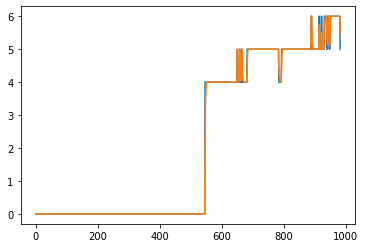

In [11]:
sfam_max = SFAM(6, alpha = 4.084979094859232e-07, rho = 0.0009686028049355828, beta = 6.613883552322061e-05, uncommited_value = 0.9883119821455072)

for i in range(len(X_max)):
    sfam_max.train(X_max[i], y_categoric[i])
    
p = []
for i in range(len(X_val)):
    p.append(sfam_max.predict(X_val[i]))

def smoothing(y, si = 6):
    result = []
    ss = 0
    rul = 0
    for i in range(len(y)):
        if ss == si:
            rul = y[i]
            ss = 0
        else:
            rul = (rul + y[i]) / 2.0
            ss += 1
        result.append(rul)
    return result

plt.plot(p)
plt.plot(smoothing(p))
